## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('/Users/ruhel/Desktop/Python/Springboard/DataScienceGuidedCapstone/1600185186_GridSearchKNN_Case_Study/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[cols] = diabetes_data[cols].replace(0, np.nan)
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

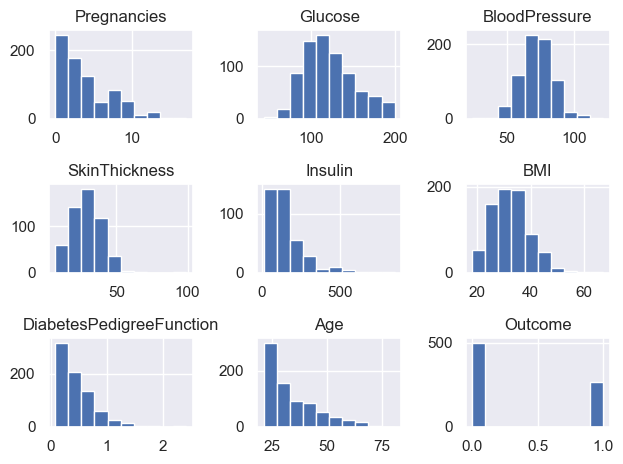

In [6]:
diabetes_data.hist()
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(),inplace=True)

/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_5005/1374832373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_5005/1374832373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [8]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

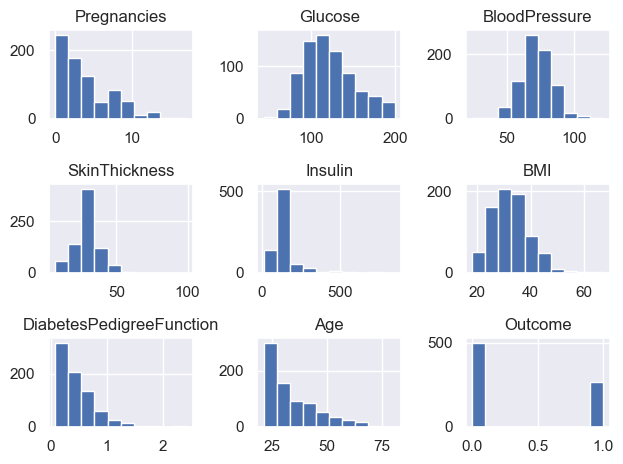

In [9]:
diabetes_data.hist()
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


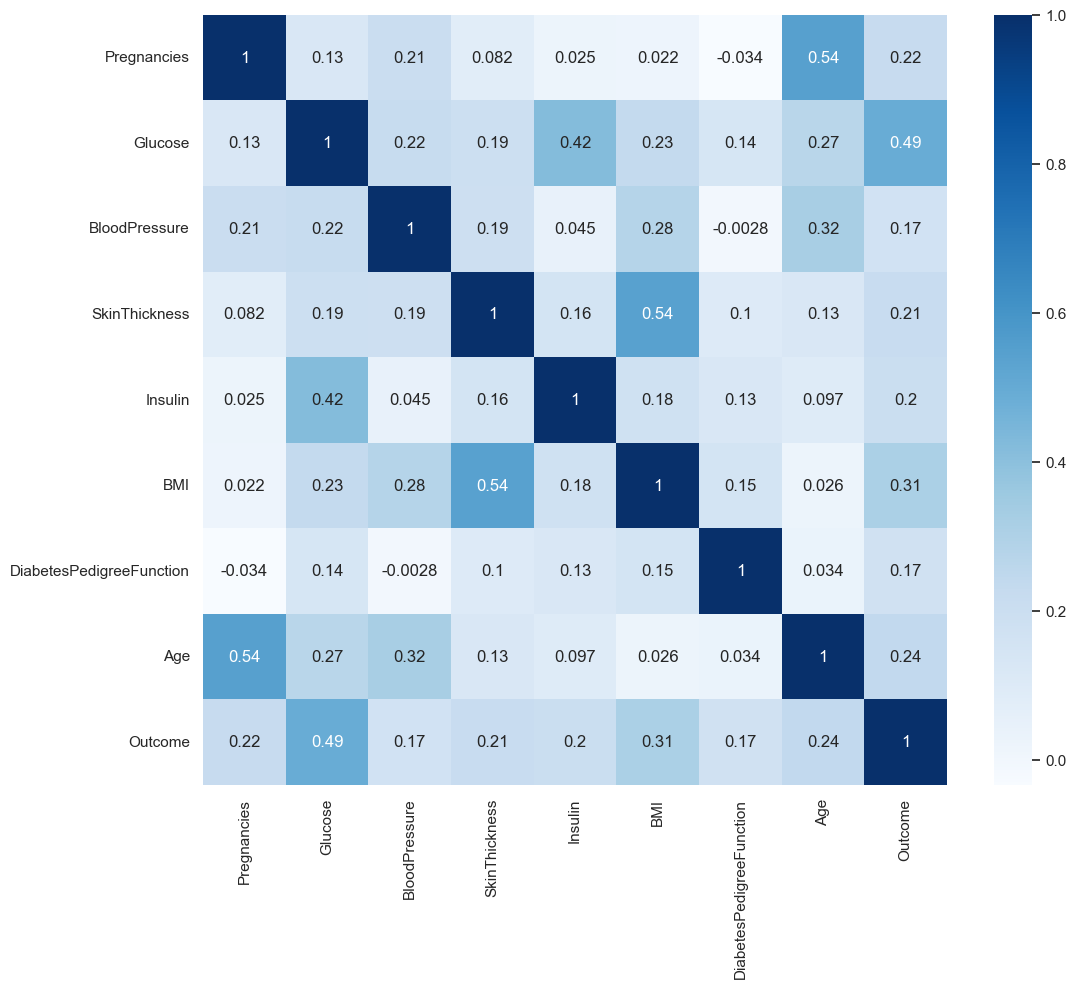

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
from sklearn.model_selection import train_test_split

# 70 / 30 split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on trianing data and transform test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [14]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [20]:
print('Train Score:', train_scores)
print('Test Score:', test_scores)

Train Score: [1.0, 0.851024208566108, 0.8547486033519553, 0.8417132216014898, 0.839851024208566, 0.8230912476722533, 0.8342644320297952, 0.8212290502793296, 0.8268156424581006]
Test Score: [0.6666666666666666, 0.670995670995671, 0.670995670995671, 0.6926406926406926, 0.7012987012987013, 0.683982683982684, 0.7316017316017316, 0.7359307359307359, 0.7316017316017316]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

#### Maximum train score of 1 at 1 neighbor

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

#### Maximum test score of 0.7359 at 8 neighbors

Plot the train and test model performance by number of neighbors.

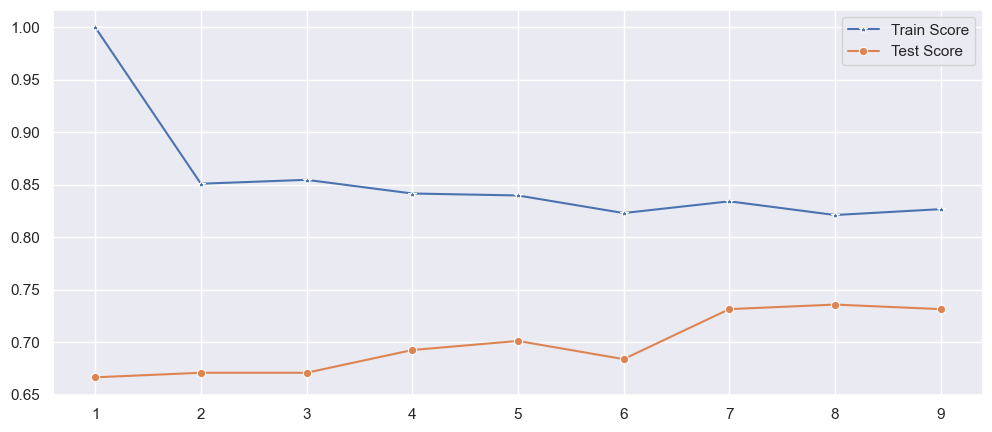

In [22]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x = range(1,10),y = train_scores,marker='*',label='Train Score')
p = sns.lineplot(x = range(1,10), y = test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [23]:
# Initializw
knn = KNeighborsClassifier(n_neighbors=8)

# Fit on training set
knn.fit(X_train, y_train)


,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

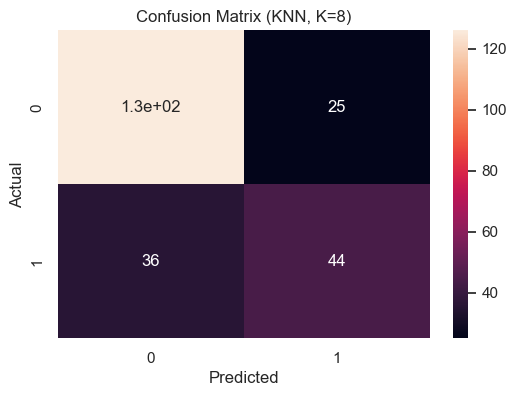

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(pl, annot=True, xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN, K=8)')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [30]:
from sklearn.metrics import classification_report
CR = classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)'])
print(CR)

                 precision    recall  f1-score   support

No Diabetes (0)       0.78      0.83      0.81       151
   Diabetes (1)       0.64      0.55      0.59        80

       accuracy                           0.74       231
      macro avg       0.71      0.69      0.70       231
   weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': array([ 1, 2..., 47, 48, 49])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(31)


#### Print the best score and best parameter for n_neighbors.

In [32]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': np.int64(31)}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [38]:
# Checking for class imbalance 
diabetes_data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Dataset is mildly imbalance, roughly 2:1, meaning model may lean towards predicting **No Diabetes (0)**. 

In [41]:
from  sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the param grid
param_grid = {
                'n_estimators': [50,100,200,300,500],
                'max_depth': [5,8,10],
                'min_samples_split':[2,5,10],
                'min_samples_leaf':[1,2,4]
                }

# Grid search with cross validation 
grid_search = GridSearchCV(
                estimator=rf,
                param_grid=param_grid,
                cv=5,
                scoring = 'accuracy',
                n_jobs=1
)

# Fit on training set 
grid_search.fit(X_train, y_train)

# Best parameters and score 
print('Best Parameters:', grid_search.best_params_)
print('Best Cross Validation Score:', grid_search.best_score_)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross Validation Score: 0.7839044652128765


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Final model using the best parameters 
rf_final = RandomForestClassifier(
            n_estimators=300,
            max_depth=8,
            min_samples_leaf=1,
            min_samples_split=10,
            random_state=42,
            class_weight='balanced')

# train rf_final on training set
rf_final.fit(X_train, y_train)

# Predictions
y_pred = rf_final.predict(X_test)

# Evaluate 
print('Test Accuracy :', accuracy_score(y_test, y_pred))
print('\nClassification Report :\n', classification_report(y_test,y_pred))



Test Accuracy : 0.7532467532467533

Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       151
           1       0.62      0.76      0.68        80

    accuracy                           0.75       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.77      0.75      0.76       231



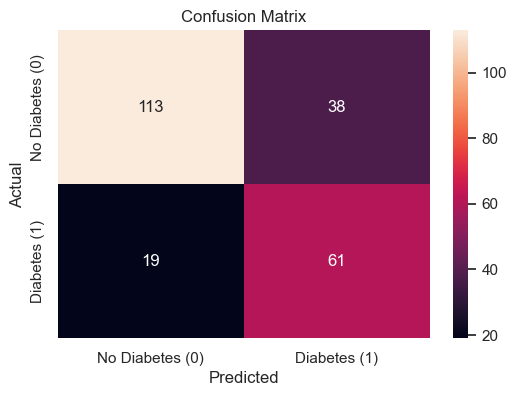

In [46]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# plot cm
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["No Diabetes (0)", "Diabetes (1)"], 
            yticklabels=["No Diabetes (0)", "Diabetes (1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The final Random Forest model achieved a test accuracy of 75%, indicating it correctly predicts three out of four cases on the test set. Examining the classification report, the model shows high precision (0.86) and good recall (0.75) for class 0 (No Diabetes), meaning it correctly identifies most non-diabetic patients. For class 1 (Diabetes), the model achieves recall of 0.76, successfully capturing the majority of diabetic cases, although precision is lower (0.62), indicating some false positives. The F1-score reflects a balanced performance, with slightly better results for the majority class. The confusion matrix further illustrates these results: out of 151 non-diabetic patients, 113 were correctly predicted and 38 misclassified as diabetic, while out of 80 diabetic patients, 61 were correctly identified and 19 missed. Overall, the model strikes a reasonable balance between sensitivity for diabetes detection and overall accuracy, which is particularly important in a healthcare context where identifying true positive cases is critical.

AUC Score: 0.8100993377483444


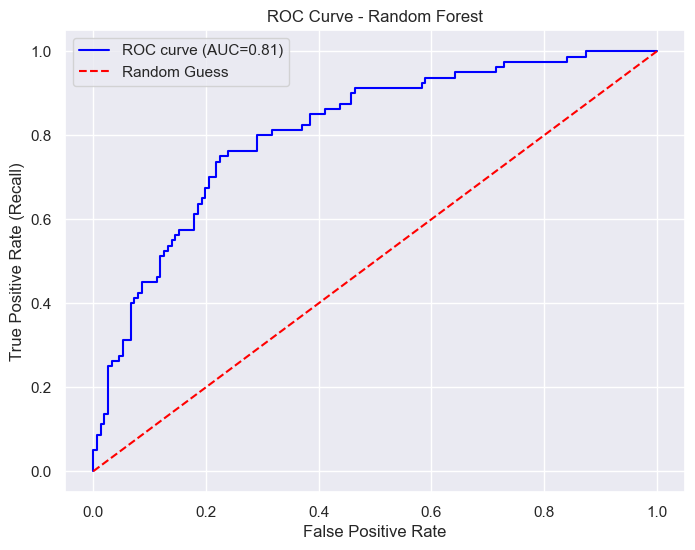

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predictive probabilty for positive class (outcome=1)
y_prob = rf_final.predict_proba(X_test)[:,1]

# Compute false postive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_prob)
print('AUC Score:', auc_score)

# plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='blue', label=f'ROC curve (AUC={auc_score:.2f})')
plt.plot([0,1],[0,1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

The ROC curve further supports the model’s performance, visually illustrating its ability to distinguish between diabetic and non-diabetic patients. The curve plots the true positive rate (recall) against the false positive rate at different classification thresholds. For this model, the curve stays well above the diagonal (random guess) line, reflecting that the classifier reliably separates the two classes. The AUC of 0.81 quantifies this performance, indicating an 81% chance that a randomly chosen diabetic patient will be assigned a higher probability of being positive than a randomly chosen non-diabetic patient. This confirms that the model not only achieves good accuracy but also maintains strong discriminative power, which is particularly important in healthcare settings where detecting true positive cases is critical.